In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

In [4]:
N =200
r1=1
r2=4

X_1_1=r1*np.sin([ np.sqrt(2)*i + np.random.normal(0,0.12) for i in range(N)]) 
X_1_2 = r1*np.cos([ np.sqrt(2)*i + np.random.normal(0,0.12) for i in range(N)])

X_2_1=r2*np.sin([ np.sqrt(2)*i + np.random.normal(0,0.07) for i in range(N)]) 
X_2_2 = r2*np.cos([ np.sqrt(2)*i + np.random.normal(0,0.07) for i in range(N)])



X_1_1=np.transpose(np.array([X_1_1]))
X_1_2=np.transpose(np.array([X_1_2]))
X_2_1=np.transpose(np.array([X_2_1]))
X_2_2=np.transpose(np.array([X_2_2]))

X_1 = np.concatenate((X_1_1,X_1_2),axis=1)
X_2 = np.concatenate((X_2_1,X_2_2),axis=1)

X=np.concatenate((X_1,X_2))

Y_1 = np.ones(N, dtype=int)
Y_2 = -np.ones(N, dtype=int)
Y = np.concatenate((Y_1, Y_2))


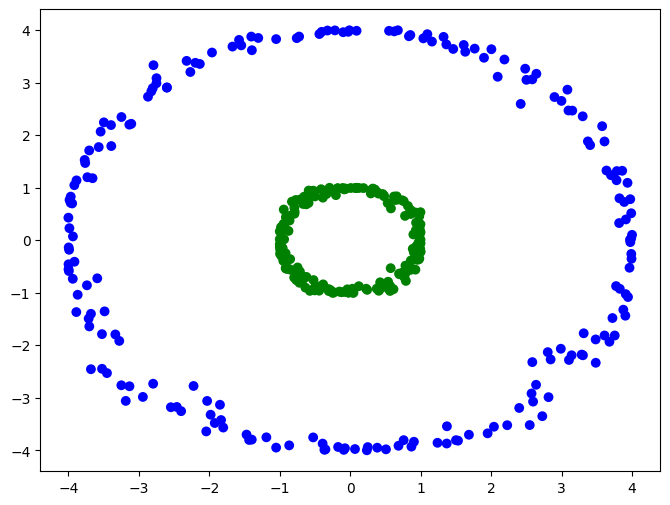

In [5]:
cmp = np.array(['r','g', 'b'])
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0],X[:,1], c=cmp[Y], s=50, edgecolors='none')
plt.show()

Plotting X_train versus X_test

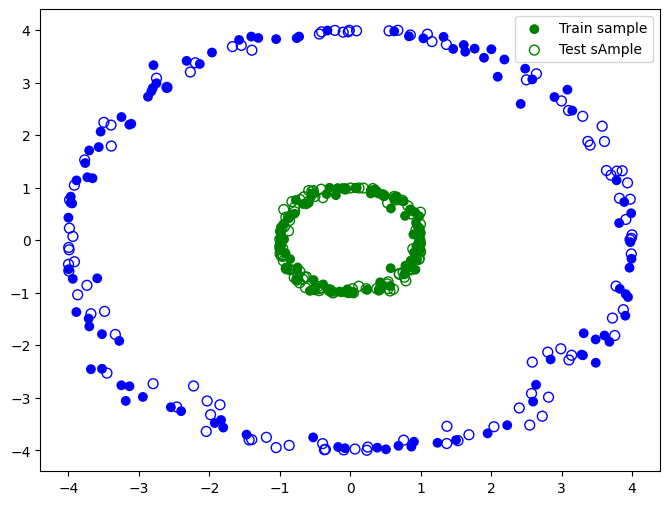

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test=train_test_split(X,Y,test_size=0.5,random_state=0)

plt.figure(figsize=(8, 6))
plt.scatter(X_train[:,0],X_train[:,1], c=cmp[y_train], s=50, edgecolors='none', label="Train sample")
plt.scatter(X_test[:,0], X_test[:,1], c='none' ,s=50, edgecolors=cmp[y_test], label="Test sAmple")
plt.legend()
plt.show()

Learning (SVM for classification using Gaussian kernel)

In [10]:
from sklearn import svm

In [11]:
clf=svm.SVC(C=1.0,kernel='rbf',gamma=1)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

1.0

In [235]:
clf.predict([[0,0]])

array([1])

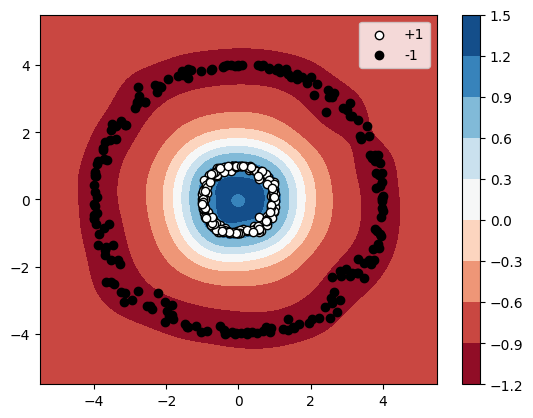

In [12]:
# Afficher les points et les vecteurs les plus proches du plan de séparation
xx, yy = np.meshgrid(np.linspace(-5.5, 5.5, 200), np.linspace(-5.5, 5.5, 200))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
y_pred = clf.predict(X)

# Choix du jeu de couleurs
# Trace le contour de la fonction de décision
c=plt.contourf(xx, yy, Z, cmap='RdBu')
plt.colorbar(c)
# Affiche les points considérés comme "inliers"
plt.scatter(X[y_pred>0,0], X[y_pred>0,1], c='white', edgecolors='k', label='+1')
# Affiche les points considérés comme "outliers"
plt.scatter(X[y_pred<=0,0], X[y_pred<=0,1], c='black', label='-1')
plt.legend()
plt.show()

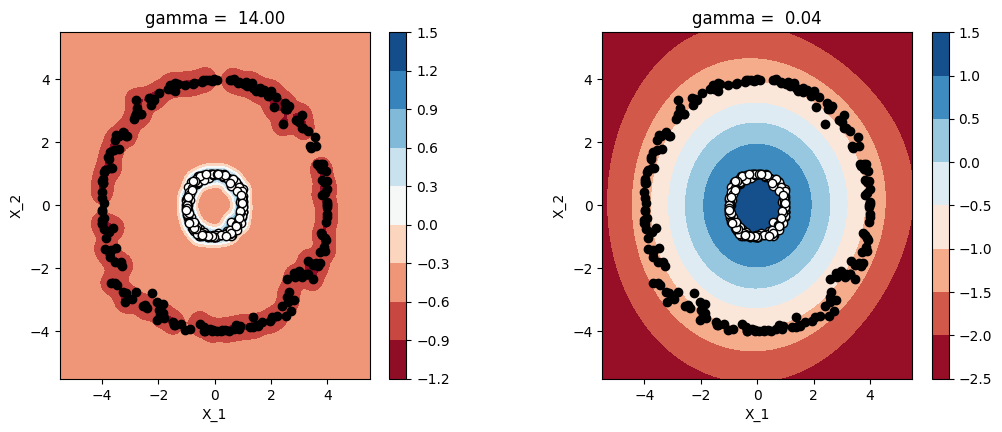

In [13]:
gamma_1=14
gamma_2 = 0.04
clf=svm.SVC(C=1.0,kernel='rbf',gamma=gamma_1,probability=True).fit(X_train,y_train)
clf_2=svm.SVC(C=1.0,kernel='rbf',gamma=gamma_2,probability=True).fit(X_train,y_train)


titles = [f'gamma = {gamma_1 : .2f}', f'gamma = {gamma_2 : .2f}']

fig = plt.figure(figsize=(12, 4.5))
xx, yy = np.meshgrid(np.linspace(-5.5, 5.5, 200), np.linspace(-5.5, 5.5, 200))

for i, clf in enumerate((clf, clf_2)):
    plt.subplot(1, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    y_pred = clf.predict(X)
    c=plt.contourf(xx, yy, Z, cmap='RdBu', alpha=1)
    plt.colorbar(c)
    # Afficher aussi les points d'apprentissage
    plt.scatter(X[y_pred>0,0], X[y_pred>0,1], c='white', edgecolors='k', label='+1')
    # Affiche les points considérés comme "outliers"
    plt.scatter(X[y_pred<=0,0], X[y_pred<=0,1], c='black', label='-1')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.title(titles[i])
plt.show()

With PCA


In [14]:
from sklearn.decomposition import PCA, KernelPCA

# ACP
pca = PCA(n_components=2)
X_s = pca.fit(X_train).transform(X_train)

#Kernel ACP 

kernel_pca = KernelPCA(n_components=None,kernel='rbf',gamma=0.2, fit_inverse_transform=True, alpha=0.1)
X_s_kernel_pca = kernel_pca.fit(X_train).transform(X_train)

PCA Effect : 

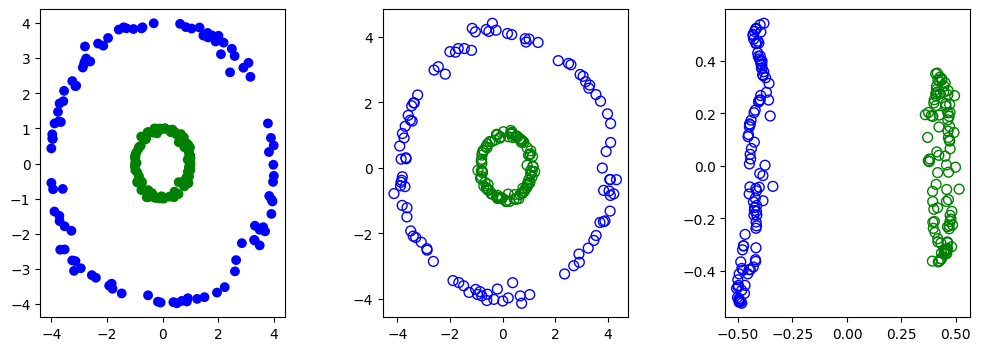

In [15]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.scatter(X_train[:,0],X_train[:,1], c=cmp[y_train], s=50, edgecolors='none', label="before PCA")
plt.subplot(1, 3, 2)
plt.scatter(X_s[:,0], X_s[:,1], c='none' ,s=50, edgecolors=cmp[y_train], label="PCA transform")
plt.subplot(1, 3, 3)
plt.scatter(X_s_kernel_pca[:,0], X_s_kernel_pca[:,1], c='none' ,s=50, edgecolors=cmp[y_train], label="Kernel PCA transform")
plt.show()

Impact of gamma (Kernel PCA): 

In [16]:
gammas_kernel_pca=[i*0.05 for i in range(1,10)]

len(gammas_kernel_pca)
ncol = min(3,len(gammas_kernel_pca))
nrow=len(gammas_kernel_pca)//3

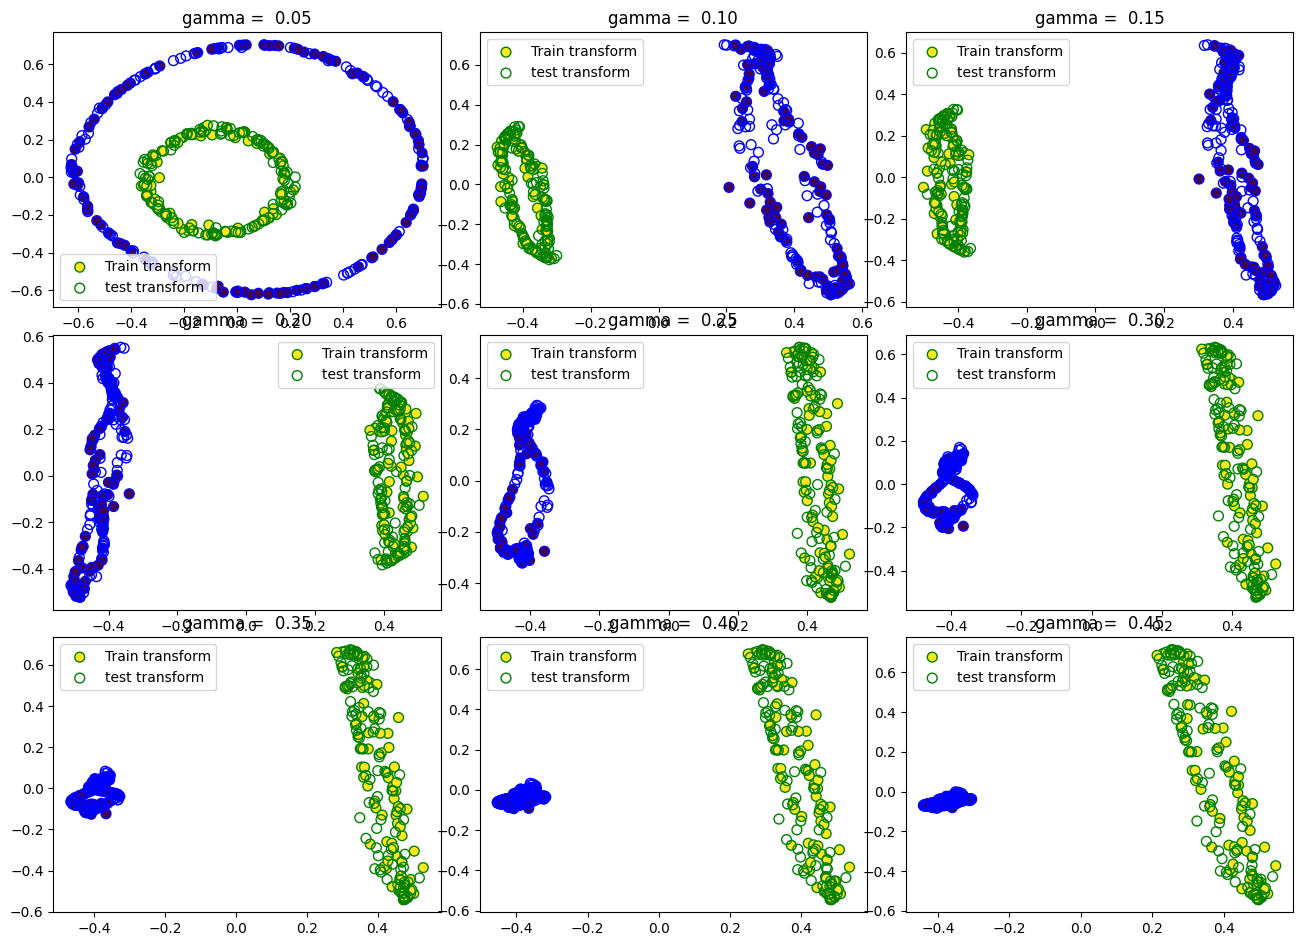

In [17]:
fig,axs = plt.subplots(nrows=nrow,ncols=ncol,figsize=(16,22))
fig.subplots_adjust(hspace=0.1, wspace=0.1,top=0.8,bottom = 0.4)
axs=np.array(axs)
for ax,gamma_kernel_pca in zip(axs.reshape(-1),gammas_kernel_pca):
    kernel_pca = KernelPCA(n_components=None,kernel='rbf',gamma=gamma_kernel_pca, fit_inverse_transform=True, alpha=0.1)
    X_s_kernel_pca = kernel_pca.fit(X_train).transform(X_train)
    X_s_test=kernel_pca.transform(X_test)
    ax.scatter(X_s_kernel_pca[:,0], X_s_kernel_pca[:,1], c=y_train ,s=50, edgecolors=cmp[y_train], label="Train transform")
    ax.scatter(X_s_test[:,0], X_s_test[:,1], c='none' ,s=50, edgecolors=cmp[y_test], label="test transform")
    ax.set_title(f'gamma = { gamma_kernel_pca : .2f}')
    ax.legend()
plt.show()